In [75]:
from main import *
import creds
import pandas as pd
from datetime import datetime
# from operator import index

Get PWS measurement data from WU for selected days and combine into one table

In [76]:
date1= '20230501'
date2 = '20230502'
date3 = '20230503'

In [77]:
response_dict1 = get_daily_weather(date = date1 ,station_id = 'IPOBIE4', api_key = creds.api_key).json()
response_dict2 = get_daily_weather(date = date2 ,station_id = 'IPOBIE4', api_key = creds.api_key).json()
response_dict3 = get_daily_weather(date = date3 ,station_id = 'IPOBIE4', api_key = creds.api_key).json()

In [78]:
pws_obs1 = response_dict1['observations'][0]['metric']
pws_obs2 = response_dict2['observations'][0]['metric']
pws_obs3 = response_dict3['observations'][0]['metric']

In [79]:
dfs = pd.DataFrame([pws_obs1, pws_obs2, pws_obs3])
dfs

,tempHigh,tempLow,tempAvg,windspeedHigh,windspeedLow,windspeedAvg,windgustHigh,windgustLow,windgustAvg,dewptHigh,...,windchillLow,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal
0,18.6,2.2,11.3,19.8,0.0,3.8,21.9,0.0,5.3,2.9,...,2.2,11.2,18.6,2.2,11.3,1029.63,1020.22,-0.37,0.00,0.0
1,19.9,8.8,13.6,22.4,0.0,7.0,31.4,0.0,9.3,9.3,...,7.4,13.6,19.9,8.8,13.6,1030.82,1018.93,0.42,1.19,0.2
2,15.7,4.9,10.3,15.4,0.0,2.8,20.1,0.0,3.8,4.1,...,4.9,10.2,15.7,4.9,10.3,1034.24,1030.61,0.11,0.00,0.0


Get current conditions and display station's ID, time and temperature

In [80]:
response_dict = get_current_weather(station_id = 'IPOBIE4', api_key = creds.api_key).json()
response_dict

{'observations': [{'stationID': 'IPOBIE4',
   'obsTimeUtc': '2023-05-08T12:11:31Z',
   'obsTimeLocal': '2023-05-08 14:11:31',
   'neighborhood': 'Pobiedziska',
   'softwareType': 'EasyWeatherV1.6.5',
   'country': 'PL',
   'solarRadiation': 573.8,
   'lon': 17.284,
   'realtimeFrequency': None,
   'epoch': 1683547891,
   'lat': 52.479,
   'uv': 5.0,
   'winddir': 91,
   'humidity': 43.0,
   'qcStatus': 1,
   'metric': {'temp': 14.7,
    'heatIndex': 14.7,
    'dewpt': 2.3,
    'windChill': 14.7,
    'windSpeed': 12.6,
    'windGust': 16.6,
    'pressure': 1036.34,
    'precipRate': 0.0,
    'precipTotal': 0.0,
    'elev': 32.9}}]}

In [81]:
pws_obs = response_dict['observations'][0]
pws_obs

{'stationID': 'IPOBIE4',
 'obsTimeUtc': '2023-05-08T12:11:31Z',
 'obsTimeLocal': '2023-05-08 14:11:31',
 'neighborhood': 'Pobiedziska',
 'softwareType': 'EasyWeatherV1.6.5',
 'country': 'PL',
 'solarRadiation': 573.8,
 'lon': 17.284,
 'realtimeFrequency': None,
 'epoch': 1683547891,
 'lat': 52.479,
 'uv': 5.0,
 'winddir': 91,
 'humidity': 43.0,
 'qcStatus': 1,
 'metric': {'temp': 14.7,
  'heatIndex': 14.7,
  'dewpt': 2.3,
  'windChill': 14.7,
  'windSpeed': 12.6,
  'windGust': 16.6,
  'pressure': 1036.34,
  'precipRate': 0.0,
  'precipTotal': 0.0,
  'elev': 32.9}}

In [82]:
pws_obs['metric']

{'temp': 14.7,
 'heatIndex': 14.7,
 'dewpt': 2.3,
 'windChill': 14.7,
 'windSpeed': 12.6,
 'windGust': 16.6,
 'pressure': 1036.34,
 'precipRate': 0.0,
 'precipTotal': 0.0,
 'elev': 32.9}

In [83]:
print('Station ID: ', pws_obs['stationID'])
print('Date: ', datetime.strptime(date1, '%Y%m%d').strftime('%d/%m/%Y'))
print('Temperature: ', pws_obs['metric']['temp'])

Station ID:  IPOBIE4
Date:  01/05/2023
Temperature:  14.7


Get data from a month

In [84]:
month = get_monthly_weather(2023, 2, 'IPOBIE4', creds.api_key)
month

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [85]:
daily = []
for day in month:
    day_json = day.json()
    pws_obs = day_json['observations'][0]['metric']
    daily.append(pws_obs)

daily

[{'tempHigh': 4.3,
  'tempLow': 1.7,
  'tempAvg': 3.1,
  'windspeedHigh': 29.5,
  'windspeedLow': 0.0,
  'windspeedAvg': 11.0,
  'windgustHigh': 49.7,
  'windgustLow': 0.0,
  'windgustAvg': 15.3,
  'dewptHigh': 2.3,
  'dewptLow': 0.2,
  'dewptAvg': 1.2,
  'windchillHigh': 3.8,
  'windchillLow': -2.6,
  'windchillAvg': 0.4,
  'heatindexHigh': 4.3,
  'heatindexLow': 1.7,
  'heatindexAvg': 3.1,
  'pressureMax': 1004.84,
  'pressureMin': 1002.03,
  'pressureTrend': -0.05,
  'precipRate': 1.8,
  'precipTotal': 1.6},
 {'tempHigh': 4.4,
  'tempLow': -1.3,
  'tempAvg': 2.0,
  'windspeedHigh': 31.4,
  'windspeedLow': 0.0,
  'windspeedAvg': 10.5,
  'windgustHigh': 40.4,
  'windgustLow': 0.0,
  'windgustAvg': 14.4,
  'dewptHigh': 2.0,
  'dewptLow': -3.3,
  'dewptAvg': 0.2,
  'windchillHigh': 4.3,
  'windchillLow': -4.0,
  'windchillAvg': -0.6,
  'heatindexHigh': 4.4,
  'heatindexLow': -1.3,
  'heatindexAvg': 2.0,
  'pressureMax': 1020.42,
  'pressureMin': 999.63,
  'pressureTrend': 0.7,
  'precip

In [86]:
daily_dfs = pd.DataFrame(daily)
daily_dfs

,tempHigh,tempLow,tempAvg,windspeedHigh,windspeedLow,windspeedAvg,windgustHigh,windgustLow,windgustAvg,dewptHigh,...,windchillLow,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal
0,4.3,1.7,3.1,29.5,0.0,11.0,49.7,0.0,15.3,2.3,...,-2.6,0.4,4.3,1.7,3.1,1004.84,1002.03,-0.05,1.80,1.60
1,4.4,-1.3,2.0,31.4,0.0,10.5,40.4,0.0,14.4,2.0,...,-4.0,-0.6,4.4,-1.3,2.0,1020.42,999.63,0.70,4.19,2.31
2,4.5,-1.9,1.1,23.8,0.0,7.9,33.2,0.0,10.7,4.1,...,-5.7,-1.0,4.5,-1.9,1.1,1020.62,1001.93,-0.55,11.99,10.11
3,2.2,-2.6,-1.1,45.4,0.3,12.6,60.5,1.8,16.1,1.2,...,-9.7,-4.7,2.2,-2.6,-1.1,1035.12,1006.84,1.17,3.00,0.51
4,3.4,-6.1,-3.1,15.4,0.0,2.1,21.9,0.0,2.8,1.9,...,-7.9,-3.5,3.4,-6.1,-3.1,1038.13,1034.81,0.12,0.00,0.00
5,2.9,-4.9,-2.4,12.2,0.0,1.6,14.8,0.0,2.3,-1.0,...,-6.5,-2.5,2.9,-4.9,-2.4,1040.33,1036.23,0.10,0.00,0.00
6,-0.5,-6.0,-2.3,8.7,0.0,1.3,11.1,0.0,1.9,-2.9,...,-6.0,-2.4,-0.5,-6.0,-2.3,1041.52,1038.84,0.05,0.00,0.00
7,1.5,-3.4,-1.3,14.8,0.0,3.8,20.1,0.0,5.2,-3.7,...,-6.7,-2.0,1.5,-3.4,-1.3,1043.21,1037.72,-0.14,0.00,0.00
8,3.0,-4.5,-0.9,19.8,0.0,6.4,23.8,0.0,8.5,-4.0,...,-9.0,-2.8,3.0,-4.5,-0.9,1038.13,1028.24,-0.38,0.00,0.00
9,2.9,-2.1,0.7,20.1,0.3,8.5,25.6,1.8,10.9,0.3,...,-6.7,-1.8,2.9,-2.1,0.7,1031.02,1027.84,-0.03,0.00,0.00


<AxesSubplot:xlabel='Day', ylabel='Temperature'>

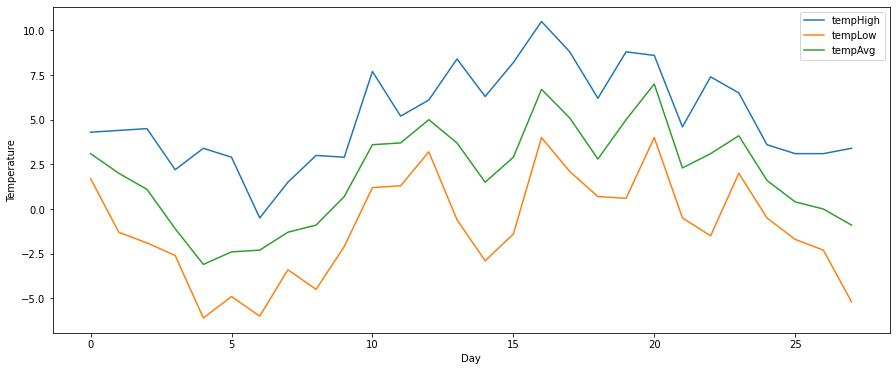

In [87]:
daily_dfs.plot(y = ['tempHigh', 'tempLow', 'tempAvg'], figsize=(15, 6), xlabel='Day', ylabel='Temperature')

In [88]:
df_precipSum = daily_dfs[['precipTotal']].cumsum(axis = 0).rename(columns = {'precipTotal':'precipSum'})
df_precipSum

,precipSum
0,1.60
1,3.91
2,14.02
3,14.53
4,14.53
5,14.53
6,14.53
7,14.53
8,14.53
9,14.53


In [89]:
dfs_merged = pd.concat([daily_dfs, df_precipSum], axis = 1)
dfs_merged

,tempHigh,tempLow,tempAvg,windspeedHigh,windspeedLow,windspeedAvg,windgustHigh,windgustLow,windgustAvg,dewptHigh,...,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal,precipSum
0,4.3,1.7,3.1,29.5,0.0,11.0,49.7,0.0,15.3,2.3,...,0.4,4.3,1.7,3.1,1004.84,1002.03,-0.05,1.80,1.60,1.60
1,4.4,-1.3,2.0,31.4,0.0,10.5,40.4,0.0,14.4,2.0,...,-0.6,4.4,-1.3,2.0,1020.42,999.63,0.70,4.19,2.31,3.91
2,4.5,-1.9,1.1,23.8,0.0,7.9,33.2,0.0,10.7,4.1,...,-1.0,4.5,-1.9,1.1,1020.62,1001.93,-0.55,11.99,10.11,14.02
3,2.2,-2.6,-1.1,45.4,0.3,12.6,60.5,1.8,16.1,1.2,...,-4.7,2.2,-2.6,-1.1,1035.12,1006.84,1.17,3.00,0.51,14.53
4,3.4,-6.1,-3.1,15.4,0.0,2.1,21.9,0.0,2.8,1.9,...,-3.5,3.4,-6.1,-3.1,1038.13,1034.81,0.12,0.00,0.00,14.53
5,2.9,-4.9,-2.4,12.2,0.0,1.6,14.8,0.0,2.3,-1.0,...,-2.5,2.9,-4.9,-2.4,1040.33,1036.23,0.10,0.00,0.00,14.53
6,-0.5,-6.0,-2.3,8.7,0.0,1.3,11.1,0.0,1.9,-2.9,...,-2.4,-0.5,-6.0,-2.3,1041.52,1038.84,0.05,0.00,0.00,14.53
7,1.5,-3.4,-1.3,14.8,0.0,3.8,20.1,0.0,5.2,-3.7,...,-2.0,1.5,-3.4,-1.3,1043.21,1037.72,-0.14,0.00,0.00,14.53
8,3.0,-4.5,-0.9,19.8,0.0,6.4,23.8,0.0,8.5,-4.0,...,-2.8,3.0,-4.5,-0.9,1038.13,1028.24,-0.38,0.00,0.00,14.53
9,2.9,-2.1,0.7,20.1,0.3,8.5,25.6,1.8,10.9,0.3,...,-1.8,2.9,-2.1,0.7,1031.02,1027.84,-0.03,0.00,0.00,14.53


In [90]:
dfs_merged.to_excel('out.xlsx')

Text(0, 0.5, 'Precipitation/day')

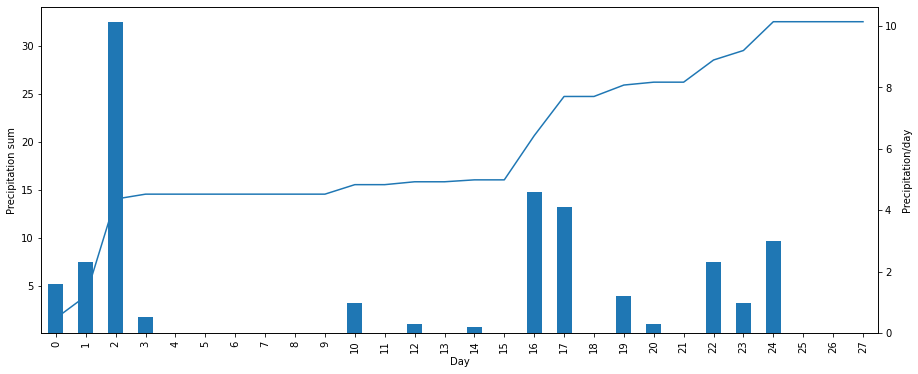

In [91]:
dfs_merged['precipSum'].plot(figsize=(15, 6), ylabel='Precipitation sum')
dfs_merged['precipTotal'].plot(secondary_y = True, kind = 'bar', figsize=(15, 6), xlabel='Day').set_ylabel('Precipitation/day')